In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
modeling_data = catalog.load("modeling_data")

                    INFO     Loading data from 'modeling_data' (ParquetDataSet)...              ]8;id=722534;file:///Users/mauricioaraujo/anaconda3/envs/spaceship/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=194954;file:///Users/mauricioaraujo/anaconda3/envs/spaceship/lib/python3.8/site-packages/kedro/io/data_catalog.py#475\475]8;;\

In [3]:
parameters = catalog.load("parameters")

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=920595;file:///Users/mauricioaraujo/anaconda3/envs/spaceship/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=755070;file:///Users/mauricioaraujo/anaconda3/envs/spaceship/lib/python3.8/site-packages/kedro/io/data_catalog.py#475\475]8;;\

In [4]:
parameters


{
    'model_options': {'test_size': 0.2, 'random_state': 3, 'n_iter': 1, 'scoring': 'roc_auc'},
    'col_maps': {'TARGET_COL': 'Transported', 'ID_COL': 'PassengerId'}
}

In [5]:
ID_COL = parameters['col_maps']['ID_COL']
TARGET_COL = parameters['col_maps']['TARGET_COL']

features_cols = modeling_data.columns.difference([ID_COL, TARGET_COL])

X = modeling_data[features_cols]
y = modeling_data[TARGET_COL]

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age_Cat               8336 non-null   category
 1   Cabin_Deck            8494 non-null   object  
 2   Cabin_Region          8693 non-null   object  
 3   Cabin_Side            8494 non-null   object  
 4   CryoSleep             8476 non-null   object  
 5   Destination           8511 non-null   object  
 6   Family_Size           8493 non-null   float64 
 7   FoodCourt             8510 non-null   float64 
 8   Group_Size            8693 non-null   int64   
 9   HomePlanet            8492 non-null   object  
 10  People_in_Cabin_Deck  8494 non-null   float64 
 11  People_in_Cabin_Num   8494 non-null   float64 
 12  RoomService           8512 non-null   float64 
 13  ShoppingMall          8485 non-null   float64 
 14  Solo                  8693 non-null   int64   
 15  Spa 

In [7]:
X.head()

,Age_Cat,Cabin_Deck,Cabin_Region,Cabin_Side,CryoSleep,Destination,Family_Size,FoodCourt,Group_Size,HomePlanet,People_in_Cabin_Deck,People_in_Cabin_Num,RoomService,ShoppingMall,Solo,Spa,VIP,VRDeck
0,Adult,B,A,P,False,TRAPPIST-1e,1.0,0.0,1,Europa,779.0,18.0,0.0,0.0,1,0.0,False,0.0
1,Pre_Adult,F,A,S,False,TRAPPIST-1e,4.0,9.0,1,Earth,2794.0,18.0,109.0,25.0,1,549.0,False,44.0
2,Elder,A,A,S,False,TRAPPIST-1e,6.0,3576.0,2,Europa,256.0,18.0,43.0,0.0,0,6715.0,True,49.0
3,Adult,A,A,S,False,TRAPPIST-1e,6.0,1283.0,2,Europa,256.0,18.0,0.0,371.0,0,3329.0,False,193.0
4,Teenager,F,A,S,False,TRAPPIST-1e,6.0,70.0,1,Earth,2794.0,15.0,303.0,151.0,1,565.0,False,2.0


# Modeling

## Lazy Classifier

In [6]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LazyClassifier(predictions=True)

models_summary, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Imprima um resumo dos modelos e suas métricas de desempenho
print(models_summary)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:06<00:00,  4.67it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.79               0.79     0.79      0.79   
RandomForestClassifier             0.79               0.79     0.79      0.79   
SVC                                0.79               0.79     0.79      0.79   
XGBClassifier                      0.78               0.78     0.78      0.78   
AdaBoostClassifier                 0.78               0.78     0.78      0.78   
CalibratedClassifierCV             0.78               0.78     0.78      0.78   
BaggingClassifier                  0.78               0.78     0.78      0.78   
LinearSVC                          0.78               0.78     0.78      0.78   
LogisticRegression                 0.78               0.78     0.78      0.78   
ExtraTreesClassifier               0.78               0.78     0.78      0.78   
NuSVC                       

## Random Forest

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Carregue os dados de exemplo do Iris dataset
from sklearn.datasets import load_iris
import mlflow

In [9]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defina as colunas numéricas e categóricas
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=[object, bool]).columns.tolist()

# Crie um pipeline para o pré-processamento dos dados
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crie o pipeline completo com o pré-processamento e o classificador
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Defina os hiperparâmetros para o grid search e random search
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

In [11]:
# Inicie um novo experimento
with mlflow.start_run(run_name="Random Forest") as run:

    # Realize o random search para encontrar os melhores hiperparâmetros
    tuning = RandomizedSearchCV(
        pipeline,
        param_distributions=param_grid,
        n_iter=20,
        cv=5,
        scoring='accuracy',
        verbose=0
    )

    tuning.fit(X_train, y_train)
    y_pred = tuning.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Random Search - Acurácia:", accuracy)
    
    mlflow.log_params(tuning.best_params_)
    mlflow.log_metric("tuning_accuracy", accuracy)
    model = tuning.best_estimator_
    # Salve o melhor modelo encontrado pelo grid search
    mlflow.sklearn.log_model(model, "tuning_best_model")

Random Search - Acurácia: 0.7958596894767107


[08/16/23 21:26:17] WARNING  /Users/mauricioaraujo/anaconda3/envs/spaceship/lib/python3.8/site-pack ]8;id=858440;file:///Users/mauricioaraujo/anaconda3/envs/spaceship/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=133290;file:///Users/mauricioaraujo/anaconda3/envs/spaceship/lib/python3.8/warnings.py#109\109]8;;\
                             ages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is                       
                             replacing distutils.                                                                  
                               warnings.warn("Setuptools is replacing distutils.")                                 
                                                                                                                   

In [12]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Family_Size', 'FoodCourt',
                                                   'Group_Size',
                                                   'People_in_Cabin_Deck',
                                                   'People_in_Cabin_Num',
                                                   'RoomService',
                                                   'ShoppingMall', 'Solo',
                                                   'Spa', 'VRDeck']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cabin_Deck', 'Cabin_Region',
                                                   'Cabin_Side', 'CryoSleep',
                                                   'Destination', 'HomePlanet',
                                                   'VIP'])])),
                ('classifier', RandomForestClassifier(min_samples_split=10))])

In [19]:
feature_importances = pd.Series(
            model['classifier'].feature_importances_,
            model[:-1].get_feature_names_out()).sort_values(ascending=True)

In [20]:
feature_importances


cat__Cabin_Deck_T                 0.000084
cat__Cabin_Deck_None              0.000924
cat__Cabin_Side_None              0.000967
cat__Cabin_Deck_A                 0.001467
cat__VIP_True                     0.001638
cat__Cabin_Deck_D                 0.001939
cat__Cabin_Region_G               0.002017
cat__Destination_None             0.002500
cat__Cabin_Region_F               0.003262
cat__CryoSleep_None               0.003277
cat__HomePlanet_None              0.003382
cat__VIP_None                     0.003656
cat__VIP_False                    0.004188
cat__Cabin_Deck_B                 0.005713
cat__Cabin_Region_E               0.005789
cat__Cabin_Deck_C                 0.005808
cat__Destination_PSO J318.5-22    0.006594
cat__Cabin_Region_A               0.007328
num__Solo                         0.008576
cat__Cabin_Region_C               0.008610
cat__Cabin_Region_B               0.009181
cat__Destination_55 Cancri e      0.009675
cat__Cabin_Deck_E                 0.009893
cat__Desti

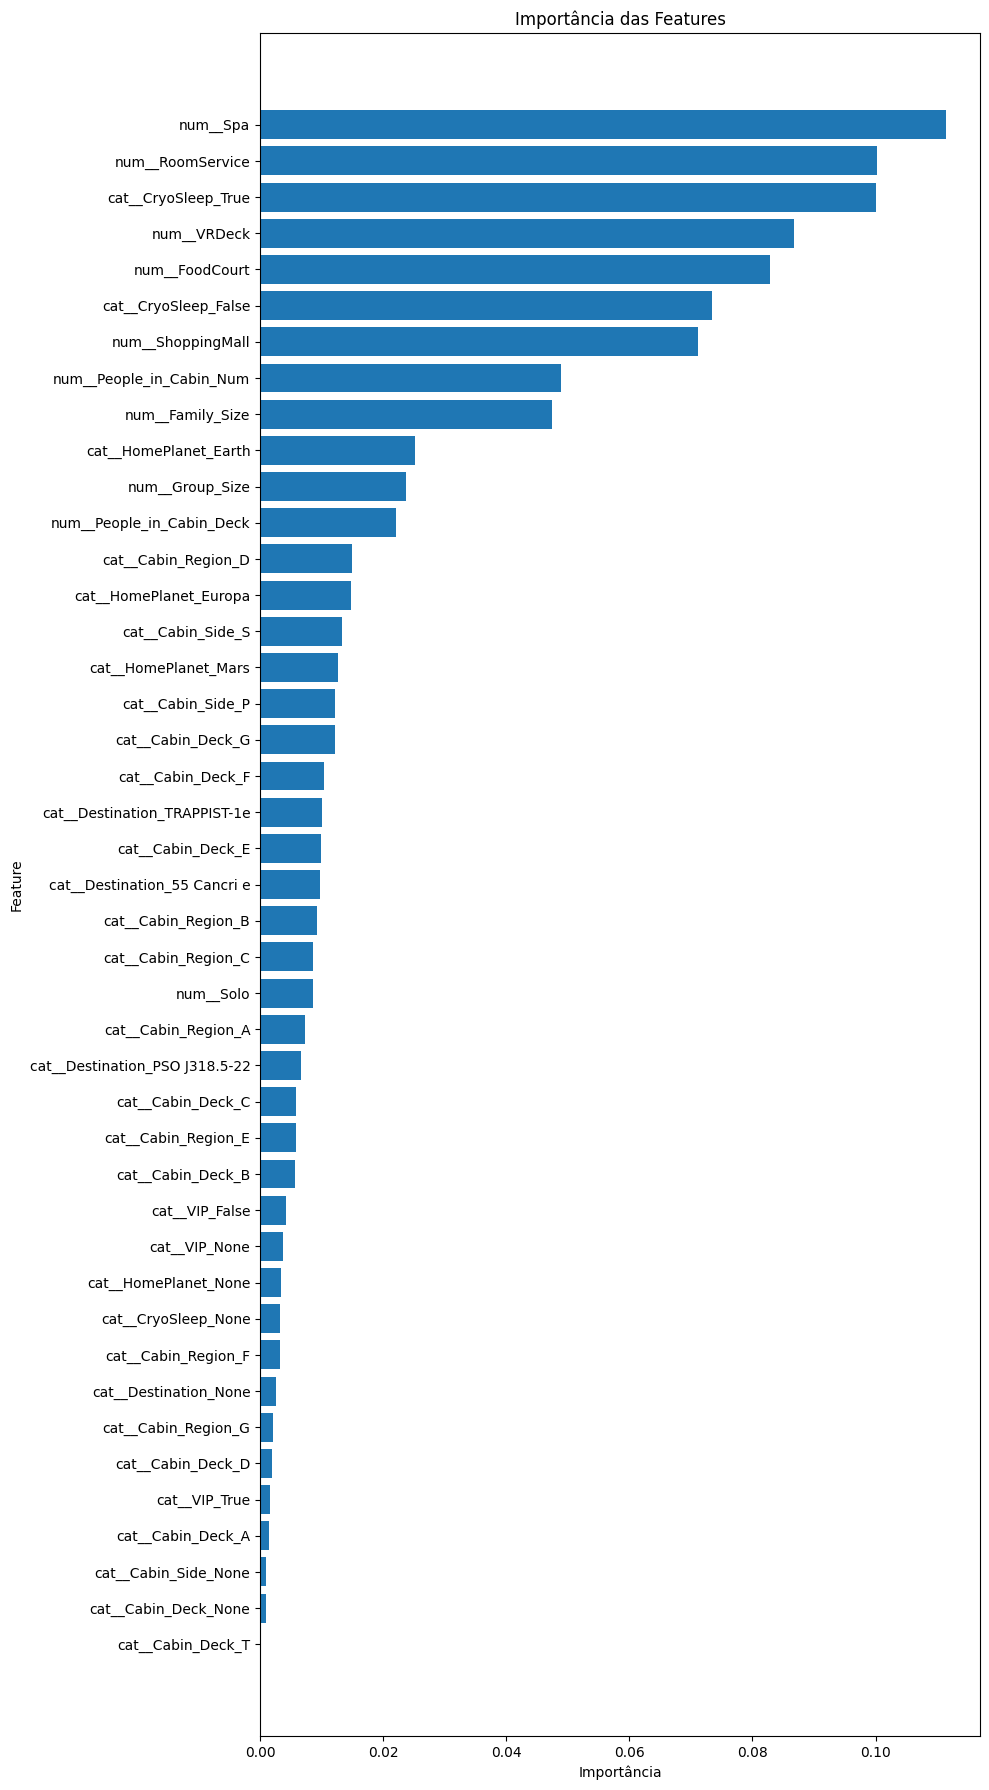

In [21]:
plt.figure(figsize=(10, 18))
plt.barh(feature_importances.index, feature_importances.values)
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features')
plt.tight_layout()